# Exploración de los datos

## Cargar los datos

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
from shapely import wkt

In [3]:
df = pd.read_csv('../data/DEvideos_cc50_202101.csv')

## Inspeccionar los datos

In [4]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,state,lat,lon,geometry
0,LgVi6y5QIjM,17.14.11,Sing zu Ende! | Gesangseinlagen vom Feinsten |...,inscope21,24,2017-11-13T17:08:49.000Z,"inscope21|""sing zu ende""|""gesangseinlagen""|""ge...",252786,35885,230,1539,https://i.ytimg.com/vi/LgVi6y5QIjM/default.jpg,False,False,False,Heute gibt es mal wieder ein neues Format... w...,Schleswig Holstein,54.783748,9.433315,POINT (9.433315388 54.78374778)
1,Bayt7uQith4,17.14.11,Kinder ferngesteuert im Kiosk! Erwachsene abzo...,LUKE! Die Woche und ich,23,2017-11-12T22:30:01.000Z,"Kinder|""ferngesteuert""|""Kinder ferngesteuert""|...",797196,53576,302,1278,https://i.ytimg.com/vi/Bayt7uQith4/default.jpg,False,False,False,Kinder ferngesteuert! Kinder lassen sich sooo ...,Nordrhein Westfalen,52.029988,8.530011,POINT (8.530011351000001 52.02998822)
2,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97190,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Saarland,49.250390,6.970003,POINT (6.970003213 49.25039044)
3,AHtypnRk7JE,17.14.11,Das Fermi-Paradoxon,100SekundenPhysik,27,2017-11-12T15:00:01.000Z,"Physik|""Wissenschaft""|""Technik""|""Science-Ficti...",380247,31821,458,1955,https://i.ytimg.com/vi/AHtypnRk7JE/default.jpg,False,False,False,►Alle Videos: http://bit.ly/1fa7Tw3\n\n\n✚Snap...,Bayern,50.266607,10.966607,POINT (10.96660681 50.26660748)
4,ZJ9We4bjcg0,17.14.11,18 SONGS mit Kelly MissesVlog (Sing-off),rezo,24,2017-11-12T13:10:36.000Z,"kelly|""missesvlog""|""kelly song""|""bausa""|""bausa...",822213,100684,2467,10244,https://i.ytimg.com/vi/ZJ9We4bjcg0/default.jpg,False,False,False,18 Song Mashup über den (veränderten) Beat von...,Berlin,52.521819,13.401549,POINT (13.40154862 52.52181866)


In [5]:
df.shape

(40840, 20)

Verifcamos los nombres de las columnas

In [6]:
df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'state', 'lat', 'lon',
       'geometry'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40840 entries, 0 to 40839
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   video_id                40840 non-null  object 
 1   trending_date           40840 non-null  object 
 2   title                   40840 non-null  object 
 3   channel_title           40840 non-null  object 
 4   category_id             40840 non-null  int64  
 5   publish_time            40840 non-null  object 
 6   tags                    40840 non-null  object 
 7   views                   40840 non-null  int64  
 8   likes                   40840 non-null  int64  
 9   dislikes                40840 non-null  int64  
 10  comment_count           40840 non-null  int64  
 11  thumbnail_link          40840 non-null  object 
 12  comments_disabled       40840 non-null  bool   
 13  ratings_disabled        40840 non-null  bool   
 14  video_error_or_removed  40840 non-null

Observamos que hay campos que **no tienen** consistencia con el tipo de dato apropiado, por ejemplo `trending_date`, `publish_time`, `category_id`, `state` y `geometry`

En este caso, `category_id` y `state` son buenas candidatas para convertirse en tipo category, ya que en pandas este tipo de dato es ideal para columnas con pocos valores únicos y repetidos.

In [8]:
(df["state"].unique(),df["state"].nunique())

(array(['Schleswig Holstein', 'Nordrhein Westfalen', 'Saarland', 'Bayern',
        'Berlin', 'Hessen', 'Rheinland Pfalz', 'Thuringen',
        'Mecklenburg Vorpommern', 'Sachsen', 'Bremen', 'Niedersachsen',
        'Sachsen Anhalt', 'Brandenburg', 'Hamburg', 'Baden Wurttemberg'],
       dtype=object),
 16)

In [9]:
(df["category_id"].unique(), df["category_id"].nunique())

(array([24, 23, 27, 22,  1,  2, 17, 26, 25, 10, 20, 43, 28, 29, 15, 19, 44,
        30]),
 18)

In [10]:
# Tabla de frecuencias
for col in df.columns:
    print(df[col].value_counts(dropna=False).head(10))  # Muestra las 10 más frecuentes
    print("\n")

video_id
pk0iqFne5eU    7
myXi1KMyClc    6
AdQsDopZfS4    5
csA3Ie-VIbs    5
F_Q6sjRRZMs    5
q23qghoF6Nk    5
9v_rtaye2yY    5
d7R7DQ5tlQo    5
iWiS48Ibuto    5
YP18Zg9OzN4    5
Name: count, dtype: int64


trending_date
17.14.11    200
17.15.11    200
17.17.11    200
17.18.11    200
17.19.11    200
17.23.11    200
17.20.11    200
17.21.11    200
17.22.11    200
17.25.11    200
Name: count, dtype: int64


title
Nur 2% aller Menschen schaffen diese 5 Rätsel..                                                      20
Most Popular Violin Covers of Popular Songs 2018 || Best Instrumental Violin Covers 2018             13
Bruno Mars,Charlie Puth,Ed Sheeran Best Christmas Songs,Greatest Hits Pop Playlist Christmas 2018    11
Ուղիղ միացում Երևանից | LIVE from Yerevan | Прямaя трансляция из Еревана                             10
Merry Christmas 2018 - Top Christmas Songs Playlist 2018 - Best Christmas Songs Ever                 10
Eminem - River ft. Ed Sheeran                                    

Verificamos valores duplicados dentro del DataFrame

In [11]:
df.duplicated().sum()

np.int64(0)

## Verificar la calidad de los datos

### ¿Por qué `video_id` tiene más de una aparición?

In [12]:
df[df['video_id'] == 'pk0iqFne5eU']

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,state,lat,lon,geometry
22375,pk0iqFne5eU,18.08.03,Was diese Ex-Serienstars HEUTE machen,Wissenswert,22,2018-03-07T16:30:01.000Z,"top 10|""top 5""|""die 10""|""wissenswert""|""lifesty...",46622,1296,184,117,https://i.ytimg.com/vi/pk0iqFne5eU/default.jpg,False,False,False,Willkommen bei wissenswert\nUnser Instagram: h...,Schleswig Holstein,54.783748,9.433315,POINT (9.433315388 54.78374778)
22557,pk0iqFne5eU,18.09.03,Was diese Ex-Serienstars HEUTE machen,Wissenswert,22,2018-03-07T16:30:01.000Z,"top 10|""top 5""|""die 10""|""wissenswert""|""lifesty...",288392,4839,2109,471,https://i.ytimg.com/vi/pk0iqFne5eU/default.jpg,False,False,False,Willkommen bei wissenswert\nUnser Instagram: h...,Baden Wurttemberg,48.999992,8.399993,POINT (8.399993448 48.99999229)
22758,pk0iqFne5eU,18.10.03,Was diese Ex-Serienstars HEUTE machen,Wissenswert,22,2018-03-07T16:30:01.000Z,"top 10|""top 5""|""die 10""|""wissenswert""|""lifesty...",817531,9717,5054,896,https://i.ytimg.com/vi/pk0iqFne5eU/default.jpg,False,False,False,Willkommen bei wissenswert\nUnser Instagram: h...,Hamburg,53.550025,9.999999,POINT (9.999999144 53.55002464)
22964,pk0iqFne5eU,18.11.03,Was diese Ex-Serienstars HEUTE machen,Wissenswert,22,2018-03-07T16:30:01.000Z,"top 10|""top 5""|""die 10""|""wissenswert""|""lifesty...",1304894,12763,6751,1110,https://i.ytimg.com/vi/pk0iqFne5eU/default.jpg,False,False,False,Willkommen bei wissenswert\nUnser Instagram: h...,Berlin,52.521819,13.401549,POINT (13.40154862 52.52181866)
23198,pk0iqFne5eU,18.12.03,Was diese Ex-Serienstars HEUTE machen,Wissenswert,22,2018-03-07T16:30:01.000Z,"top 10|""top 5""|""die 10""|""wissenswert""|""lifesty...",1649350,14414,7688,1204,https://i.ytimg.com/vi/pk0iqFne5eU/default.jpg,False,False,False,Willkommen bei wissenswert\nUnser Instagram: h...,Saarland,49.250390,6.970003,POINT (6.970003213 49.25039044)
23431,pk0iqFne5eU,18.13.03,Was diese Ex-Serienstars HEUTE machen,Wissenswert,22,2018-03-07T16:30:01.000Z,"top 10|""top 5""|""die 10""|""wissenswert""|""lifesty...",1806532,15180,8127,1315,https://i.ytimg.com/vi/pk0iqFne5eU/default.jpg,False,False,False,Willkommen bei wissenswert\nUnser Instagram: h...,Rheinland Pfalz,49.982472,8.273219,POINT (8.273219156 49.98247246)
23628,pk0iqFne5eU,18.14.03,Was diese Ex-Serienstars HEUTE machen,Wissenswert,22,2018-03-07T16:30:01.000Z,"top 10|""top 5""|""die 10""|""wissenswert""|""lifesty...",1985594,15947,8652,1384,https://i.ytimg.com/vi/pk0iqFne5eU/default.jpg,False,False,False,Willkommen bei wissenswert\nUnser Instagram: h...,Nordrhein Westfalen,52.029988,8.530011,POINT (8.530011351000001 52.02998822)


Verificamos si son duplicados

In [13]:
df[df['video_id'] == 'pk0iqFne5eU'].duplicated().sum()

np.int64(0)

### Cambiar tipo de datos

In [14]:
# Convertir a datetime los campos trending_date y publish_time
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m')
df["publish_time"] = pd.to_datetime(df['publish_time'])

In [15]:
# Convertir state y category_id a category
df["state"] = df["state"].astype("category")
df["category_id"] = df["category_id"].astype("category")

In [16]:
# Convertir geometry con geopandas
df['geometry'] = df['geometry'].apply(wkt.loads)
df = gpd.GeoDataFrame(df, geometry='geometry')

Determinamos los campos mutuamente excluyentes entre sí (mínimo 1 dato diferente por campo)

In [17]:
df_video = df[df['video_id'] == 'pk0iqFne5eU']

cols_varian = [col for col in df_video.columns if df_video[col].nunique() > 1]

df_video[cols_varian]

,trending_date,views,likes,dislikes,comment_count,state,lat,lon,geometry
22375,2018-03-08,46622,1296,184,117,Schleswig Holstein,54.783748,9.433315,POINT (9.43332 54.78375)
22557,2018-03-09,288392,4839,2109,471,Baden Wurttemberg,48.999992,8.399993,POINT (8.39999 48.99999)
22758,2018-03-10,817531,9717,5054,896,Hamburg,53.550025,9.999999,POINT (10 53.55002)
22964,2018-03-11,1304894,12763,6751,1110,Berlin,52.521819,13.401549,POINT (13.40155 52.52182)
23198,2018-03-12,1649350,14414,7688,1204,Saarland,49.250390,6.970003,POINT (6.97 49.25039)
23431,2018-03-13,1806532,15180,8127,1315,Rheinland Pfalz,49.982472,8.273219,POINT (8.27322 49.98247)
23628,2018-03-14,1985594,15947,8652,1384,Nordrhein Westfalen,52.029988,8.530011,POINT (8.53001 52.02999)


A partir de la anterior tabla, tomaremos un conjunto de datos que pueda determinar todos los registros de nuestro df original.

In [18]:
not df.duplicated(subset=['video_id', 'trending_date']).any() # Ambos campos identifican a los otros de toda la tabla


True

In [19]:
not df.duplicated(subset=['video_id', 'state']).any() # Ambos campos identifican a los otros de toda la tabla

False

Concluimos que el identificador de los registros es `video_id` y `trending_date`. Por lo tanto que un video pueda encontrarse varias veces en tendecia es correcto dentro de la tabla analizada, cambiando campos como views y state.

### Identificación de valores nulos

Verificamos los valores nulos

In [20]:
df.isnull().sum()

video_id                     0
trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description               1552
state                        0
lat                          0
lon                          0
geometry                     0
dtype: int64

### Identificación de valores atípicos

In [21]:
num_cols = df.select_dtypes(include=[np.number]).columns
num_cols = num_cols.drop(['lat', 'lon'])

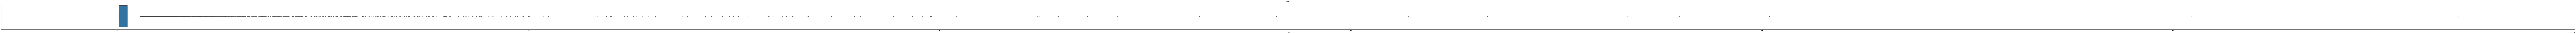

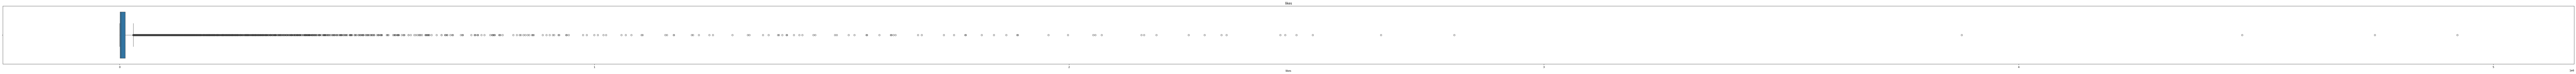

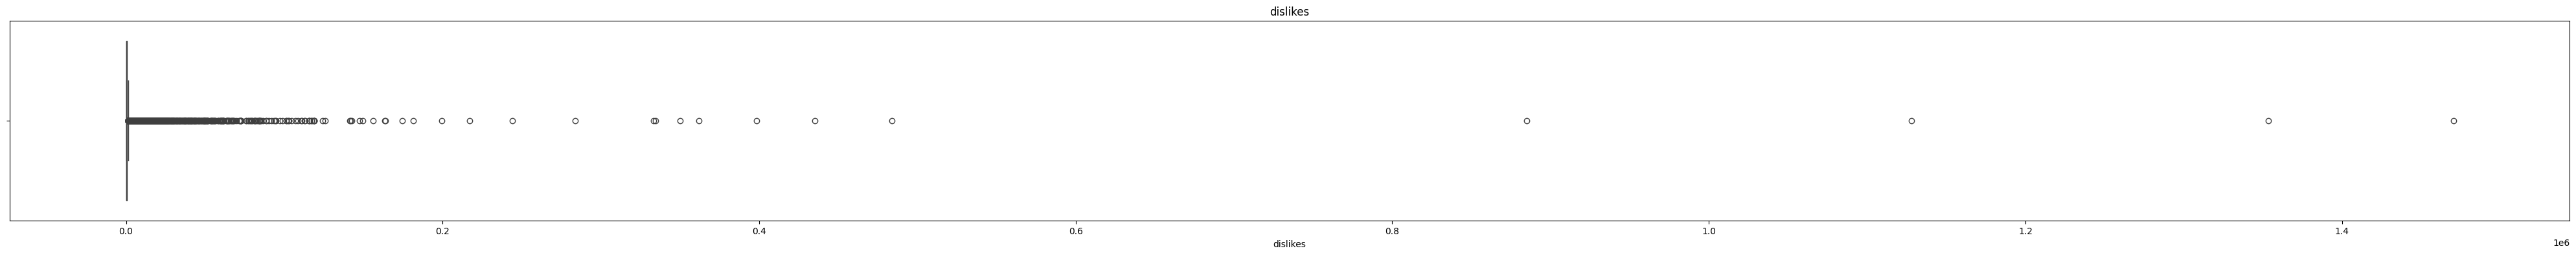

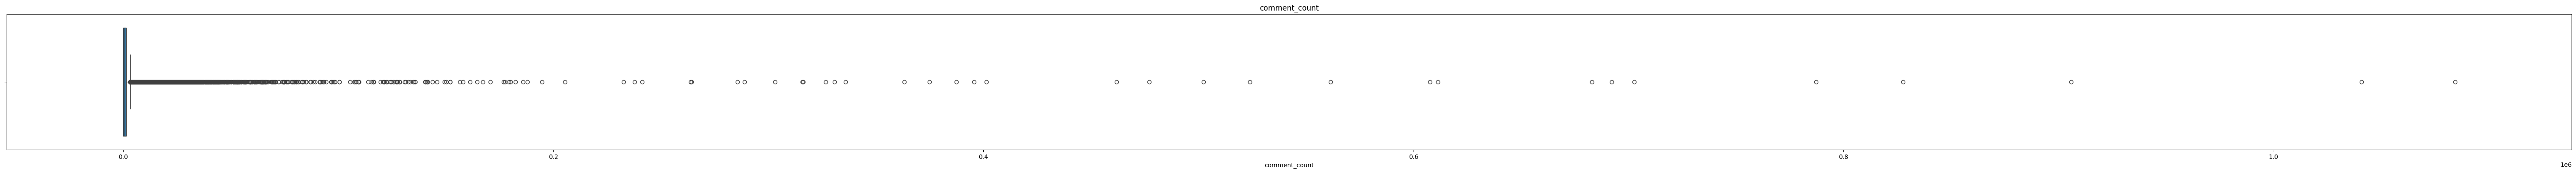

In [22]:
for col in num_cols:
    n_unique = df[col].nunique()
    plt.figure(figsize=(max(6, n_unique // 100), 4))
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()

### Verificar que la cantidad de vistas sea congruente

#### Verificamos que la cantidad de vistas no disminuya para un mismo video a lo largo del tiempo

In [23]:
videos_incongruentes = []

for video_id, group in df.groupby('video_id'):
    if (group.sort_values('trending_date')['views'].diff().dropna() < 0).any():
        videos_incongruentes.append(video_id)

print(f"Cantidad de videos con vistas incongruentes: {len(videos_incongruentes)}")

Cantidad de videos con vistas incongruentes: 7


In [24]:
videos_incongruentes

['2GFdpi253X4',
 'BEePFpC9qG8',
 'MjJTHyEgBoM',
 '_a-XUWeYNec',
 'gb9xzSQ02po',
 'lQx6YBtQZbw',
 'q8v9MvManKE']

In [25]:
df[df['video_id'] == videos_incongruentes[0]]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,state,lat,lon,geometry
35631,2GFdpi253X4,2018-05-19,زرق ورق فور | الحلقة الاولى,Alsharqiya Tube,22,2018-05-17 20:11:33+00:00,[none],674183,16946,606,2688,https://i.ytimg.com/vi/2GFdpi253X4/default.jpg,False,False,False,NaN,Sachsen,50.829984,12.919976,POINT (12.91998 50.82998)
35829,2GFdpi253X4,2018-05-20,زرق ورق فور | الحلقة الاولى,Alsharqiya Tube,22,2018-05-17 20:11:33+00:00,[none],672108,20324,770,3152,https://i.ytimg.com/vi/2GFdpi253X4/default.jpg,False,False,False,NaN,Niedersachsen,53.129999,8.220004,POINT (8.22 53.13)


La solución sería ordenar las views de menor a mayor e ir reemplazando las views desde la fecha más antigua a la más reciente. Antes de insertarlo, se debe verificar que la cantidad de likes y dislikes sea menor o igual a las vistas, y que los comentarios también cumplan esa condición.

In [26]:
# Para cada video incongruente, corregir solo el orden de views
for video_id in videos_incongruentes:
    group = df[df['video_id'] == video_id].sort_values('trending_date')
    
    # Verificar condiciones antes de ordenar
    if ((group['likes'] + group['dislikes'] > group['views']).any() or 
        (group['comment_count'] > group['views']).any()):
        print(f"El video {video_id} tiene likes+dislikes o comentarios mayores que las vistas. No se corrige.")
        continue
    # Ordenar los valores de views de menor a mayor
    sorted_views = np.sort(group['views'].values)
    # Asignar los valores ordenados a las fechas más antiguas
    df.loc[group.index, 'views'] = sorted_views

In [27]:
# Verificar que para cada video en videos_incongruentes las vistas no disminuyan a lo largo del tiempo
for video_id in videos_incongruentes:
    group = df[df['video_id'] == video_id].sort_values('trending_date')
    if (group['views'].diff().dropna() < 0).any():
        print(f"El video {video_id} NO está correctamente ordenado.")
    else:
        print(f"El video {video_id} está correctamente ordenado.")

El video 2GFdpi253X4 está correctamente ordenado.
El video BEePFpC9qG8 está correctamente ordenado.
El video MjJTHyEgBoM está correctamente ordenado.
El video _a-XUWeYNec está correctamente ordenado.
El video gb9xzSQ02po está correctamente ordenado.
El video lQx6YBtQZbw está correctamente ordenado.
El video q8v9MvManKE está correctamente ordenado.


In [28]:
df[df['video_id'] == videos_incongruentes[0]]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,state,lat,lon,geometry
35631,2GFdpi253X4,2018-05-19,زرق ورق فور | الحلقة الاولى,Alsharqiya Tube,22,2018-05-17 20:11:33+00:00,[none],672108,16946,606,2688,https://i.ytimg.com/vi/2GFdpi253X4/default.jpg,False,False,False,NaN,Sachsen,50.829984,12.919976,POINT (12.91998 50.82998)
35829,2GFdpi253X4,2018-05-20,زرق ورق فور | الحلقة الاولى,Alsharqiya Tube,22,2018-05-17 20:11:33+00:00,[none],674183,20324,770,3152,https://i.ytimg.com/vi/2GFdpi253X4/default.jpg,False,False,False,NaN,Niedersachsen,53.129999,8.220004,POINT (8.22 53.13)


#### Verificamos que la cantidad de likes y dislikes, y comentarios no sea mayor a las views

In [29]:
invalid_likes_dislikes = df[(df['likes'] + df['dislikes']) > df['views']]
invalid_comments = df[df['comment_count'] > df['views']]

print(f"Registros con likes + dislikes mayores que views: {len(invalid_likes_dislikes)}")
print(f"Registros con comentarios mayores que views: {len(invalid_comments)}")

Registros con likes + dislikes mayores que views: 1
Registros con comentarios mayores que views: 0


In [30]:
invalid_likes_dislikes 

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,state,lat,lon,geometry
32342,BEePFpC9qG8,2018-05-03,360 Google Doodles/Spotlight Stories: Back to ...,Google Spotlight Stories,1,2018-05-02 13:42:03+00:00,"google spotlight stories|""spotlight stories""|""...",73773,373875,6350,27599,https://i.ytimg.com/vi/BEePFpC9qG8/default.jpg,False,False,True,"The Google Doodle, Google Spotlight Stories, G...",Nordrhein Westfalen,52.029988,8.530011,POINT (8.53001 52.02999)


In [31]:
df.drop(invalid_likes_dislikes.index, inplace=True)

### Videos removidos

In [32]:
df[df['video_error_or_removed'] == True].shape


(13, 20)

In [33]:
df[df['video_error_or_removed'] == True]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,state,lat,lon,geometry
10259,O6hOFXYoTP4,2018-01-04,Deleted video,GoldRain,24,2018-01-03 17:56:23+00:00,[none],10904,74,2,1,https://i.ytimg.com/vi/qEpV8HMX9Mg/default.jpg,False,False,True,Liken & abonnieren nicht vergessen\nFalls Ihr ...,Saarland,49.250390,6.970003,POINT (6.97 49.25039)
11324,X-LDbt1Mv9s,2018-01-09,Deleted video,Knallerfrauen,24,2018-01-08 15:00:04+00:00,"Zweisprachige Erziehung|""Kinder zweisprachig e...",39865,1879,35,95,https://i.ytimg.com/vi/KysNWXre_z8/default.jpg,False,False,True,"Wie man Kinder zweisprachig erzieht, zeigt Mar...",Mecklenburg Vorpommern,53.633304,11.416699,POINT (11.4167 53.6333)
12005,7qmSwj8Pwys,2018-01-15,Deleted video,ApeCrime,24,2018-01-14 18:44:11+00:00,[none],323331,30064,811,2900,https://i.ytimg.com/vi/Mi-goKcEwP4/default.jpg,False,False,True,Daumen hoch für die nächste Staffel ! :)\n►Bes...,Rheinland Pfalz,49.982472,8.273219,POINT (8.27322 49.98247)
15442,Di7nXWRDp6U,2018-02-01,Deleted video,Theo,20,2018-01-29 13:30:01+00:00,"Nintendo|""Gaming""|""Mario""|""Zelda""",109605,5612,578,452,https://i.ytimg.com/vi/l54HnwlYzos/default.jpg,False,False,True,►► AKATAS LETZTES VIDEO : https://goo.gl/xcHQC...,Sachsen Anhalt,52.130421,11.620004,POINT (11.62 52.13042)
15479,rUG2eFnZD0c,2018-02-01,Deleted video,FilmSelect,24,2018-01-28 12:00:01+00:00,"filmselect|""trailer""|""german""|""deutsch""|""2018""...",95406,858,40,61,https://i.ytimg.com/vi/5bniROfg5R0/default.jpg,False,False,True,Alle neuen Kino Trailer der Kalenderwoche 3\n\...,Mecklenburg Vorpommern,53.633304,11.416699,POINT (11.4167 53.6333)
16064,kMqC_3CccX4,2018-02-04,Deleted video,Swar Shuaib,24,2018-02-03 17:30:20+00:00,"سوار شعيب|""شعيب راشد""|""مريم الصالح""|""بالمخبة""|...",664835,67294,5655,7020,https://i.ytimg.com/vi/5zGHUwkMaoo/default.jpg,False,False,True,للإعلان: ads@belmokhba.com \n\nتم اختيار هذا ا...,Niedersachsen,53.129999,8.220004,POINT (8.22 53.13)
30140,q8v9MvManKE,2018-04-22,Earth Day 2018 Google Doodle,googledoodles,1,2018-04-21 15:00:50+00:00,[none],54169,298,52,0,https://i.ytimg.com/vi/q8v9MvManKE/default.jpg,False,False,True,Today’s annual Earth Day Doodle was created in...,Brandenburg,51.770418,14.329967,POINT (14.32997 51.77042)
30340,q8v9MvManKE,2018-04-23,Earth Day 2018 Google Doodle,googledoodles,1,2018-04-21 15:00:50+00:00,[none],75420,5761,818,860,https://i.ytimg.com/vi/q8v9MvManKE/default.jpg,False,False,True,Today’s annual Earth Day Doodle was created in...,Schleswig Holstein,54.783748,9.433315,POINT (9.43332 54.78375)
30545,q8v9MvManKE,2018-04-24,Earth Day 2018 Google Doodle,googledoodles,1,2018-04-21 15:00:50+00:00,[none],124315,5342,95,614,https://i.ytimg.com/vi/q8v9MvManKE/default.jpg,False,False,True,Today’s annual Earth Day Doodle was created in...,Hamburg,53.550025,9.999999,POINT (10 53.55002)
30781,q8v9MvManKE,2018-04-25,Earth Day 2018 Google Doodle,googledoodles,1,2018-04-21 15:00:50+00:00,[none],384104,1877,224,737,https://i.ytimg.com/vi/q8v9MvManKE/default.jpg,False,False,True,Today’s annual Earth Day Doodle was created in...,Sachsen Anhalt,52.130421,11.620004,POINT (11.62 52.13042)


# Preparación de los datos

## Tratamiento de datos faltantes

Reemplazamos los nas por "Sin descripción"

In [34]:
df["description"] = df["description"].fillna("Sin descripción")
df.isnull().sum()

video_id                  0
trending_date             0
title                     0
channel_title             0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
thumbnail_link            0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
state                     0
lat                       0
lon                       0
geometry                  0
dtype: int64

## Tratamiento de datos atípicos


Como tenemos muchos valores extremos (atípicos), vamos a usar la técnica de winzorización para limitar su impacto en los análisis. Esta técnica reemplaza los valores más extremos por los valores de un percentil definido (por ejemplo, el 1% y 99%), haciendo que los resultados sean más representativos del comportamiento general de los datos.

In [35]:
from scipy.stats.mstats import winsorize

for col in ['views', 'likes', 'dislikes', 'comment_count']:
    df[f'{col}_winz'] = winsorize(df[col], limits=[0.01, 0.01])

## Construir nuevos datos

Se crear nuevas columnas que representan la proporcion de:
Likes/Dislikes
Comentario/Vistas

In [36]:
df["like_dislike_ratio"] = df["likes"] / (df["dislikes"] + 1)

In [37]:
df["comments_per_view"] = df["comment_count"] / (df["views"] + 1)

Se crear nuevas columnas que que reprensentan la hora y día de publicación 

In [38]:
df["publish_hour"] = df["publish_time"].dt.hour
df["publish_day"] = df["publish_time"].dt.day_name()

Se agrega el nombre de las categorias, creando un diccionario de id a nombre de categorias que estan en el archivo 
`DE_category_id.json`

In [39]:
import json

with open('../data/DE_category_id.json') as f:
    categories = json.load(f)

cat_map = {item['id']: item['snippet']['title'] for item in categories['items']}
df["category_name"] = df["category_id"].astype(str).map(cat_map)

In [40]:
df.to_csv('../data/data_clean.csv')

In [54]:
df_clean = pd.read_csv('../data/data_clean.csv')
df_clean.shape

(40839, 30)

# Requerimientos

## Por Categoria de Videos

### 1. ¿Qué categorías de videos son las de mayor tendencia?

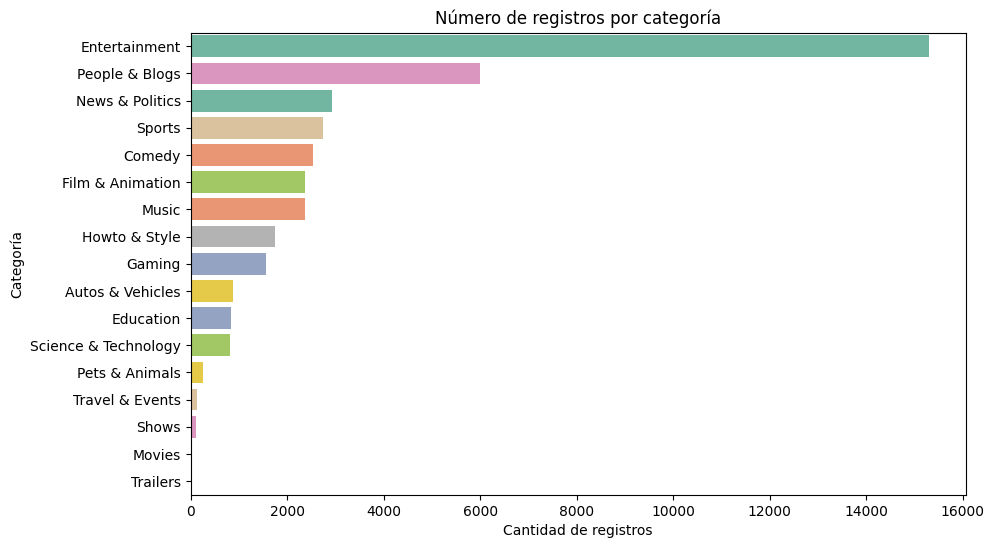

In [41]:
plt.figure(figsize=(10, 6))
sns.countplot(
    data=df,
    y="category_name",
    hue="category_name",  # Se usa también como hue
    order=df["category_name"].value_counts().index,
    palette="Set2",
    legend=False  # Para que no duplique etiquetas en la leyenda
)
plt.title("Número de registros por categoría")
plt.xlabel("Cantidad de registros")
plt.ylabel("Categoría")
plt.show()


La gráfica muestra que las categorías de videos con mayor número de registros en tendencia son principalmente **Entertainment** y **People & Blogs**, seguidas por **News & Politics**, **Sports** y **Comedy**. Esto indica que el contenido de entretenimiento y blogs personales domina la popularidad en YouTube Alemania, reflejando el interés de la audiencia por temas ligeros, actualidad y experiencias personales. Las categorías menos representadas, como **Trailers**, **Movies** y **Shows**, tienen una presencia mucho menor en las tendencias, lo que sugiere que estos temas generan menos contenido viral o de alto impacto en la plataforma.

Recomendaciones
- Enfoca tu contenido en las categorías más populares: Las categorías con mayor número de registros en tendencia, como Entertainment y People & Blogs, son ideales si buscas maximizar el alcance y la visibilidad de tus videos.

- Explora nichos con menor competencia: Categorías con menos registros en tendencia, como Trailers, Movies o Shows, pueden ofrecer oportunidades para destacar si tu contenido es relevante y de calidad.

- Diversifica tu estrategia: Considera crear contenido en varias categorías para aumentar las posibilidades de aparecer en tendencias y captar diferentes audiencias.

### 2. ¿Qué categorías de videos son los que más gustan? ¿Y las que menos gustan?

Para responder a la pregunta sobre qué categorías de videos son las que más gustan (y las que menos), se utilizó la técnica de winzorización en la variable 'likes'. Esto significa que los valores extremos (outliers) fueron recortados a los percentiles 1 y 99, evitando que unos pocos videos con cantidades de likes extremadamente altas o bajas distorsionen el promedio de cada categoría. Así, el ranking obtenido es más representativo del comportamiento general de los videos en cada categoría.

In [42]:
print(f"Número de categorías únicas: {df['category_name'].nunique()}")

Número de categorías únicas: 17


Categorías que más gustan:
category_name
Music               77590.352867
Movies              31917.000000
Comedy              28662.062352
Gaming              18446.185304
Film & Animation    18375.808842
Name: likes_winz, dtype: float64

Categorías que menos gustan:
category_name
Autos & Vehicles    7037.071019
Travel & Events     6291.035461
News & Politics     4717.604089
Shows               3540.364486
Trailers               0.000000
Name: likes_winz, dtype: float64


C:\Users\Daniel\AppData\Local\Temp\ipykernel_13568\2577242188.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=likes_por_categoria.values, y=likes_por_categoria.index, palette='mako')


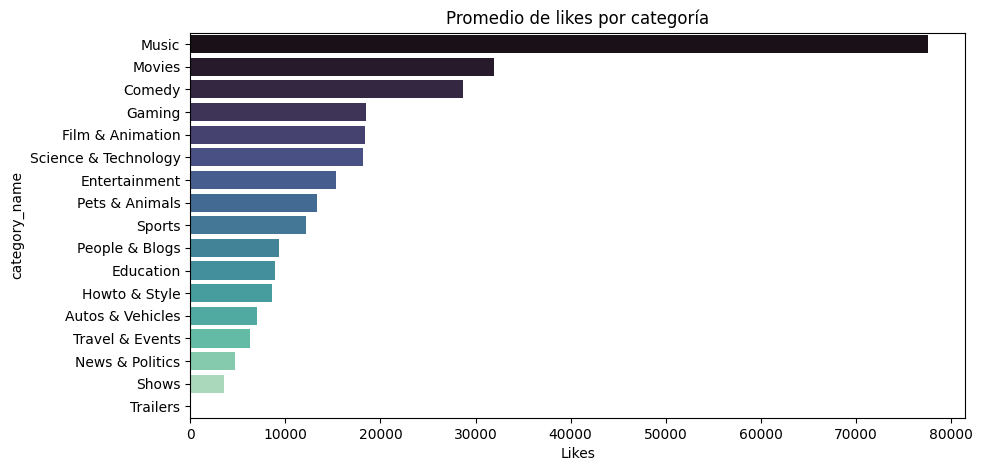

In [43]:
# Responder la pregunta 2 sin considerar outliers usando la columna ya winzorizada
likes_por_categoria = df.groupby('category_name')['likes_winz'].mean().sort_values(ascending=False)

print('Categorías que más gustan:')
print(likes_por_categoria.head())

print('\nCategorías que menos gustan:')
print(likes_por_categoria.tail())

plt.figure(figsize=(10, 5))
sns.barplot(x=likes_por_categoria.values, y=likes_por_categoria.index, palette='mako')
plt.title('Promedio de likes por categoría')
plt.xlabel('Likes')
plt.show()


La gráfica muestra el promedio de likes por categoría de video en YouTube, después de aplicar la técnica de winzorización para reducir el impacto de valores extremos. Se observa que las categorías "Music", "Movies" y "Comedy" son las que reciben más likes en promedio, mientras que categorías como "Trailers" y "Shows" tienen los promedios más bajos. Esto permite identificar qué tipo de contenido genera mayor interacción positiva entre los usuarios.

La exploración y análisis de los datos de tendencias de YouTube en Alemania revela que ciertas categorías, como "Music", "Comedy" y "Movies", tienden a generar mayor interacción positiva y volumen de likes, mientras que otras presentan menor engagement. Este insight puede guiar a creadores de contenido y marcas a enfocar sus esfuerzos en categorías con mayor potencial de viralidad y preferencia del público, optimizando así sus estrategias de contenido y campañas publicitarias para maximizar el alcance y la interacción en la plataforma.

### 3. ¿Qué categorías de videos tienen la mejor proporción (ratio) de “Me gusta” / “No me gusta”?

Tenica de modelado: Este es un problema descriptivo/exploratorio, no predictivo. No requiere un modelo de machine learning, solo análisis estadístico y visualización.

C:\Users\Daniel\AppData\Local\Temp\ipykernel_13568\4216435200.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_ratios.values, y=category_ratios.index, palette="viridis")


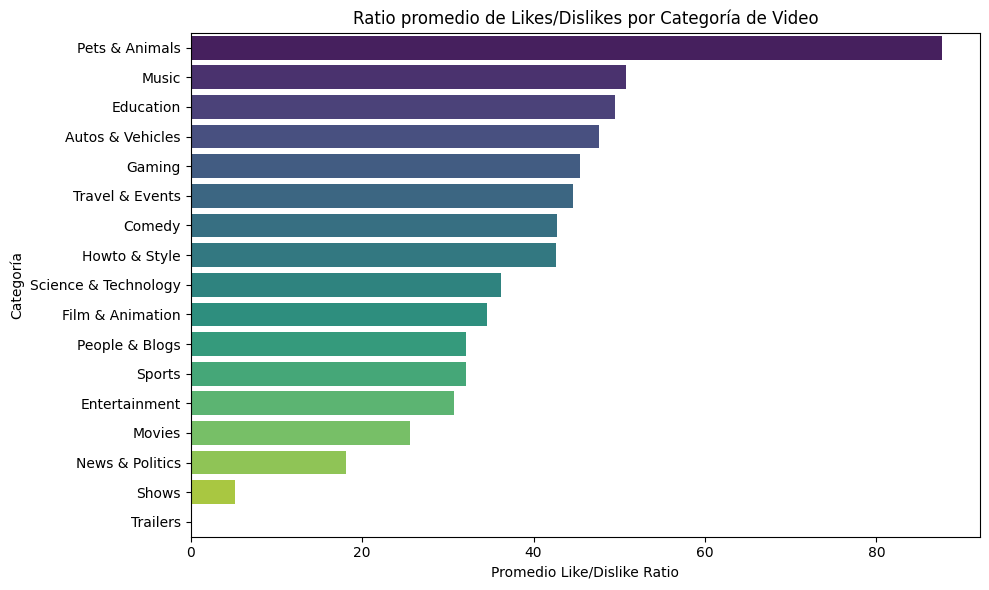

In [44]:
# Agrupar por categoría y calcular el promedio del ratio
category_ratios = df.groupby("category_name")["like_dislike_ratio"].mean().sort_values(ascending=False)

# Visualización
plt.figure(figsize=(10,6))
sns.barplot(x=category_ratios.values, y=category_ratios.index, palette="viridis")
plt.xlabel("Promedio Like/Dislike Ratio")
plt.ylabel("Categoría")
plt.title("Ratio promedio de Likes/Dislikes por Categoría de Video")
plt.tight_layout()
plt.show()

In [45]:
top3 = category_ratios.head(3)
print("Top 3 categorías con mejor ratio Like/Dislike:")
print(top3)

Top 3 categorías con mejor ratio Like/Dislike:
category_name
Pets & Animals    87.698361
Music             50.745919
Education         49.556311
Name: like_dislike_ratio, dtype: float64


### 4. ¿Qué categorías de videos tienen la mejor proporción (ratio) de “Vistas” / “Comentarios”?

In [46]:
df["view_per_comment"] = df["views"] / (df["comment_count"] + 1)

C:\Users\Daniel\AppData\Local\Temp\ipykernel_13568\2706016111.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ratio_views_comments, x="view_per_comment", y="category_name", palette="crest")


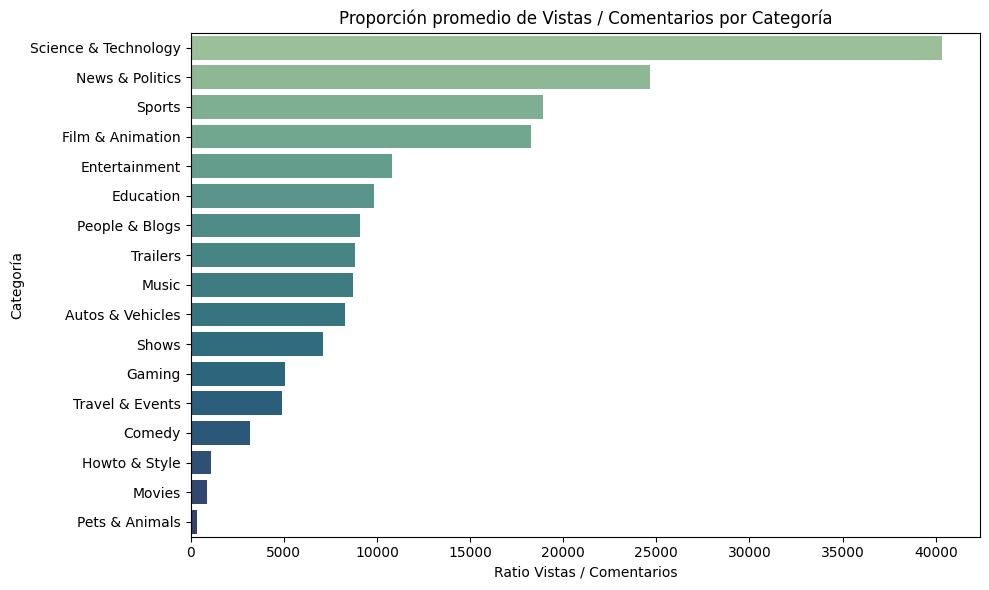

In [47]:
# Agrupar y calcular el promedio del ratio por categoría
ratio_views_comments = df.groupby("category_name")["view_per_comment"].mean().reset_index()

# Ordenar de mayor a menor
ratio_views_comments = ratio_views_comments.sort_values("view_per_comment", ascending=False)

# Visualizar
plt.figure(figsize=(10, 6))
sns.barplot(data=ratio_views_comments, x="view_per_comment", y="category_name", palette="crest")
plt.title("Proporción promedio de Vistas / Comentarios por Categoría")
plt.xlabel("Ratio Vistas / Comentarios")
plt.ylabel("Categoría")
plt.tight_layout()
plt.show()


La gráfica muestra la proporción promedio de vistas por comentario en cada categoría de video. Las categorías en la parte superior, como **Science & Technology**, **People & Blogs** y **News & Politics**, tienen un mayor número de vistas por cada comentario, lo que indica que generan mucho tráfico pero menos interacción en forma de comentarios. Por el contrario, categorías como **Pets & Animals**, **Movies** y **Howto & Style** tienen una menor proporción, lo que sugiere que sus espectadores comentan con mayor frecuencia en relación al número de vistas. Esto puede deberse a que el contenido de estas últimas categorías fomenta más la participación o discusión entre los usuarios.


**Recomendaciones:**
- Si buscas maximizar el alcance, enfócate en categorías con alto ratio de vistas por comentario.
- Para fomentar la interacción y construir comunidad, prioriza categorías donde los usuarios comentan más frecuentemente.
- Ajusta el tipo de contenido y los llamados a la acción según la categoría para lograr los objetivos de participación o visualización.



## Por el tiempo transcurrido

### 5. ¿Cómo ha cambiado el volumen de los videos en tendencia a lo largo del tiempo?

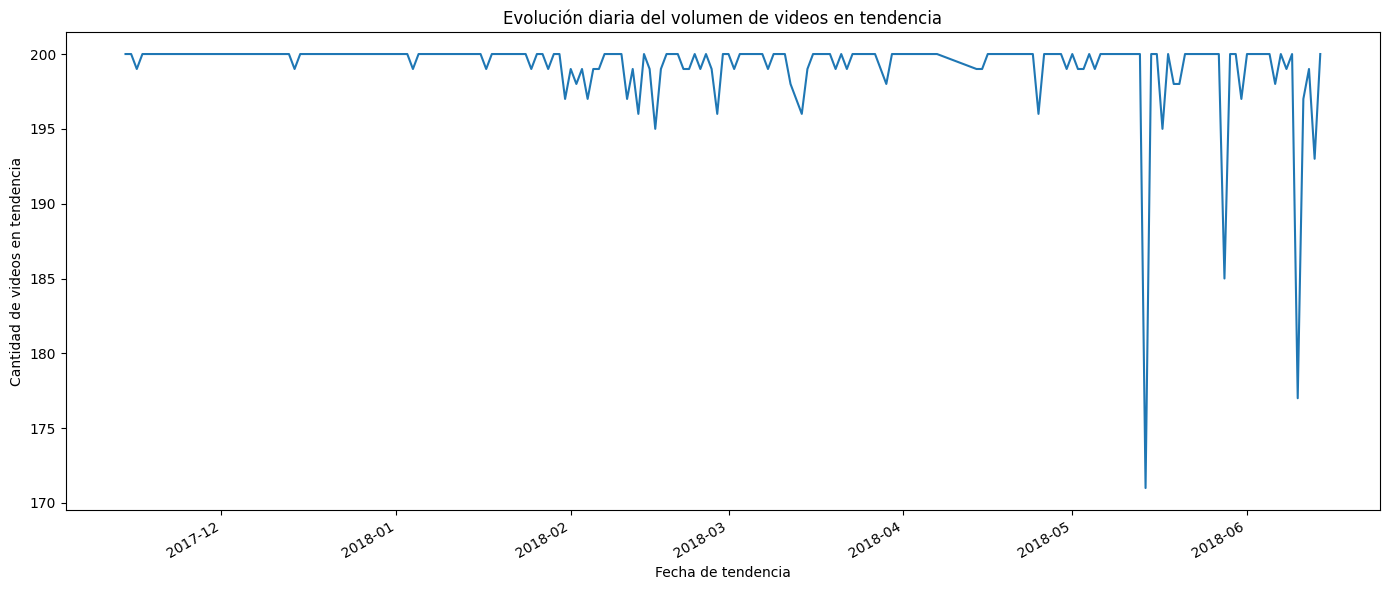

In [48]:
volumen_trending = df.groupby('trending_date')['video_id'].nunique()

volumen_trending.describe()
plt.figure(figsize=(14,6))
volumen_trending.plot()
plt.xlabel('Fecha de tendencia')
plt.ylabel('Cantidad de videos en tendencia')
plt.title('Evolución diaria del volumen de videos en tendencia')
plt.tight_layout()
plt.show()

La gráfica muestra la evolución diaria del volumen de videos en tendencia en YouTube Alemania durante el periodo analizado. El eje x representa las fechas en las que se registraron tendencias, mientras que el eje y indica la cantidad de videos que estuvieron en tendencia cada día.

Se observa que la mayoría de los días el volumen se mantiene cercano a 200 videos, lo que sugiere una consistencia en el número de videos destacados por el algoritmo de tendencias de YouTube. Sin embargo, existen algunos descensos puntuales, que pueden deberse a cambios en la plataforma, actualizaciones de datos o eliminación de videos. Esta visualización permite identificar patrones y posibles anomalías en la dinámica de los videos en tendencia a lo largo del tiempo.

Para el negocio, esto indica que la plataforma ofrece una oportunidad constante para que los creadores logren visibilidad. Se recomienda mantener una estrategia de publicación regular y monitorear los días con menor volumen, ya que podrían representar ventanas de menor competencia y mayor probabilidad de destacar en tendencias. Además, analizar las causas de las caídas puede ayudar a anticipar cambios en el algoritmo o en la dinámica de la plataforma.

## Por Canales de Youtube

### 6. ¿Qué Canales de YouTube son tendencia más frecuentemente? ¿Y cuáles con menos frecuencia?

C:\Users\Daniel\AppData\Local\Temp\ipykernel_13568\2311589533.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=channel_counts.head(10).values, y=channel_counts.head(10).index, palette="crest")


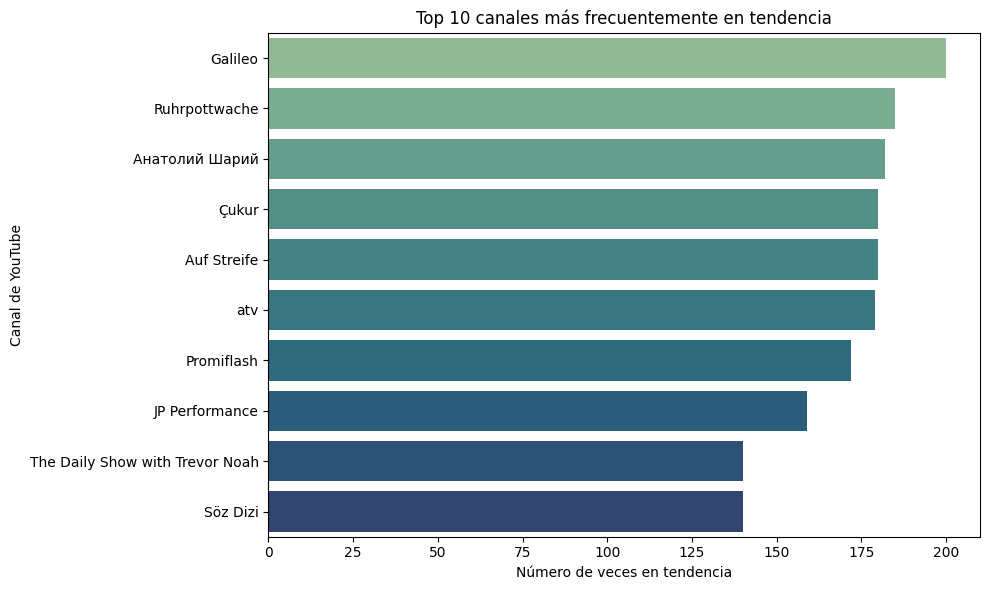

C:\Users\Daniel\AppData\Local\Temp\ipykernel_13568\2311589533.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=least_frequent.values, y=least_frequent.index, palette="flare")


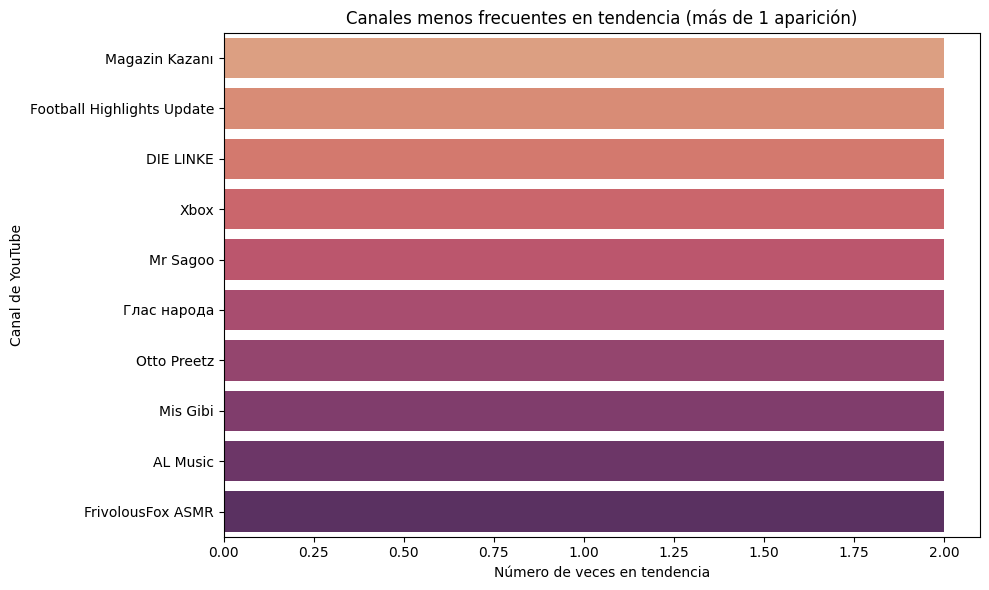

In [49]:
# Contar frecuencia de cada canal
channel_counts = df['channel_title'].value_counts()

# Top 10 canales más frecuentes
plt.figure(figsize=(10,6))
sns.barplot(x=channel_counts.head(10).values, y=channel_counts.head(10).index, palette="crest")
plt.xlabel("Número de veces en tendencia")
plt.ylabel("Canal de YouTube")
plt.title("Top 10 canales más frecuentemente en tendencia")
plt.tight_layout()
plt.show()

# Top 10 canales menos frecuentes (al menos 2 apariciones)
least_frequent = channel_counts[channel_counts > 1].tail(10)
plt.figure(figsize=(10,6))
sns.barplot(x=least_frequent.values, y=least_frequent.index, palette="flare")
plt.xlabel("Número de veces en tendencia")
plt.ylabel("Canal de YouTube")
plt.title("Canales menos frecuentes en tendencia (más de 1 aparición)")
plt.tight_layout()
plt.show()

## Por la geografia del pais

### 7. ¿En qué Estados se presenta el mayor número de “Vistas”, “Me gusta” y “No me gusta”?


In [50]:
# Agrupar por estado y sumar views, likes y dislikes
state_agg = df.groupby("state")[["views", "likes", "dislikes"]].sum()


C:\Users\Daniel\AppData\Local\Temp\ipykernel_13568\205993587.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  state_agg = df.groupby("state")[["views", "likes", "dislikes"]].sum()


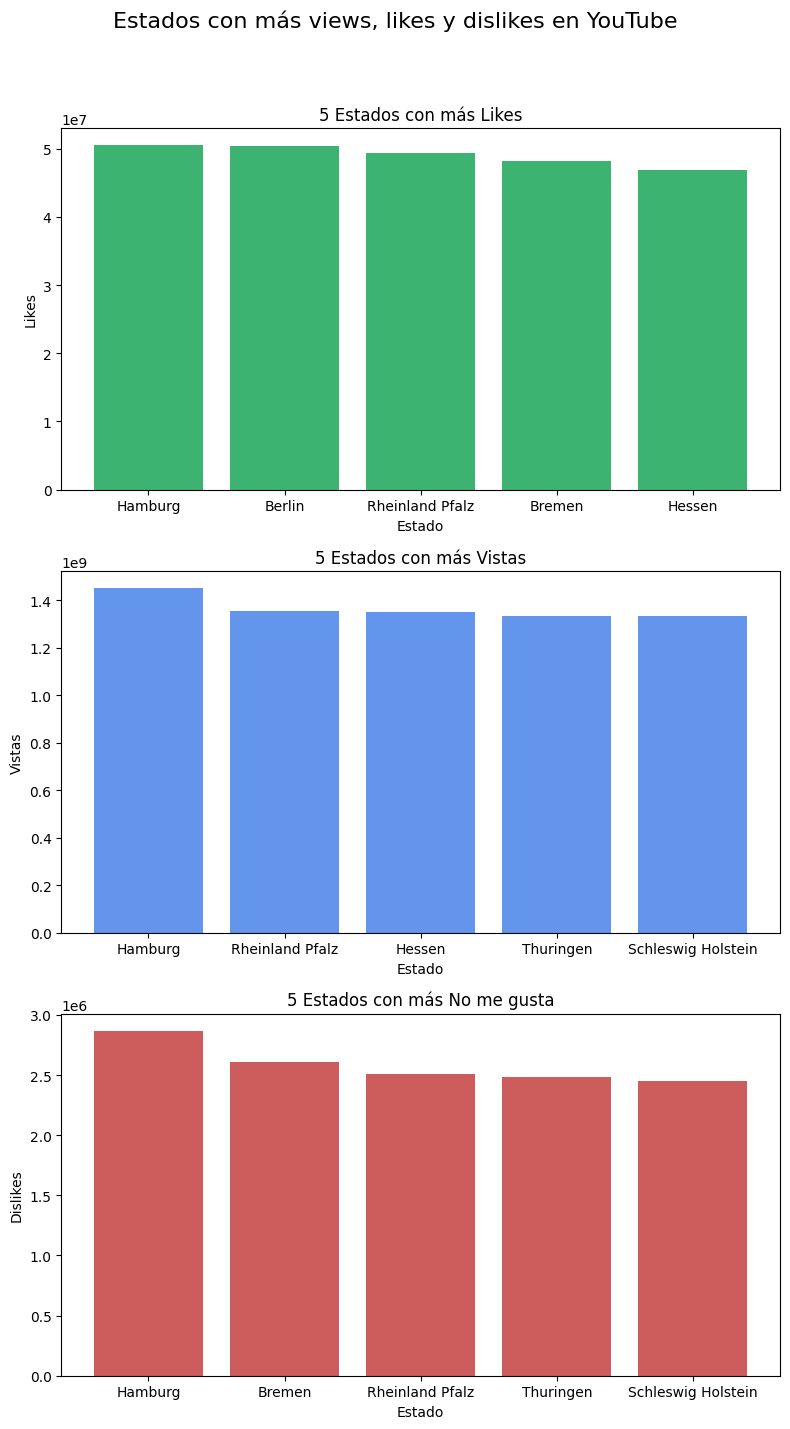

In [51]:
# Tres barplots verticales para los 5 estados con más vistas, likes y dislikes
fig, axs = plt.subplots(3, 1, figsize=(8, 15))
fig.suptitle('Estados con más views, likes y dislikes en YouTube', fontsize=16)

# 5 Estados con más Likes
top_likes = state_agg['likes'].sort_values(ascending=False).head(5)
axs[0].bar(top_likes.index, top_likes.values, color='mediumseagreen')
axs[0].set_title('5 Estados con más Likes')
axs[0].set_xlabel('Estado')
axs[0].set_ylabel('Likes')

# 5 Estados con más Vistas
top_views = state_agg['views'].sort_values(ascending=False).head(5)
axs[1].bar(top_views.index, top_views.values, color='cornflowerblue')
axs[1].set_title('5 Estados con más Vistas')
axs[1].set_xlabel('Estado')
axs[1].set_ylabel('Vistas')

# 5 Estados con más No me gusta
top_dislikes = state_agg['dislikes'].sort_values(ascending=False).head(5)
axs[2].bar(top_dislikes.index, top_dislikes.values, color='indianred')
axs[2].set_title('5 Estados con más No me gusta')
axs[2].set_xlabel('Estado')
axs[2].set_ylabel('Dislikes')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


Interpretación cada una de las tres gráficas mostradas:

- **Likes:** Los cinco estados con más "Me gusta" son Hamburg, Bremen, Hessen, Berlin y Thuringen. Esto indica que en estos estados la audiencia tiende a reaccionar positivamente al contenido, mostrando alto nivel de aprobación.
- **Vistas:** Los cinco estados con más visualizaciones son Hamburg, Thuringen, Rheinland Pfalz, Hessen y Schleswig Holstein. Esto refleja que en estos lugares se concentra el mayor consumo de videos en YouTube, probablemente por su tamaño poblacional o actividad digital.
- **Dislikes:** Los cinco estados con más "No me gusta" son Thuringen, Schleswig Holstein, Hamburg, Hessen y Bremen. Aquí se observa que algunos estados que lideran en vistas y likes también tienen una audiencia crítica o polarizada.

En resumen, Hamburg y Hessen aparecen consistentemente entre los primeros lugares en las tres métricas, lo que los posiciona como estados clave en la interacción y consumo de YouTube. Thuringen destaca especialmente en dislikes y vistas. Esto sugiere que estos estados no solo consumen mucho contenido, sino que también participan activamente, tanto de forma positiva como negativa.

**Recomendaciones:**

- **Enfocar campañas y contenido en los estados líderes:** Hamburg, Hessen y Thuringen destacan en todas las métricas, por lo que son regiones clave para lanzar campañas, colaboraciones o promociones si se busca maximizar el alcance y la interacción en YouTube.
- **Personalizar el contenido según la audiencia:** Dado que algunos estados tienen altos dislikes junto con muchas vistas, es recomendable analizar el tipo de contenido que genera polarización y ajustar los mensajes o formatos para mejorar la aceptación.
- **Monitorear tendencias locales:** Los estados que aparecen en los primeros lugares pueden marcar tendencias que luego se replican en otras regiones. Observar sus preferencias puede anticipar cambios en el consumo nacional.
- **Aprovechar la participación activa:** La alta interacción (likes y dislikes) indica una audiencia involucrada. Se pueden promover dinámicas de participación, encuestas o llamados a la acción para fortalecer la comunidad y obtener retroalimentación directa.

## Preguntas adicionales

### 8. ¿Los videos en tendencia son los que mayor cantidad de comentarios positivos reciben?

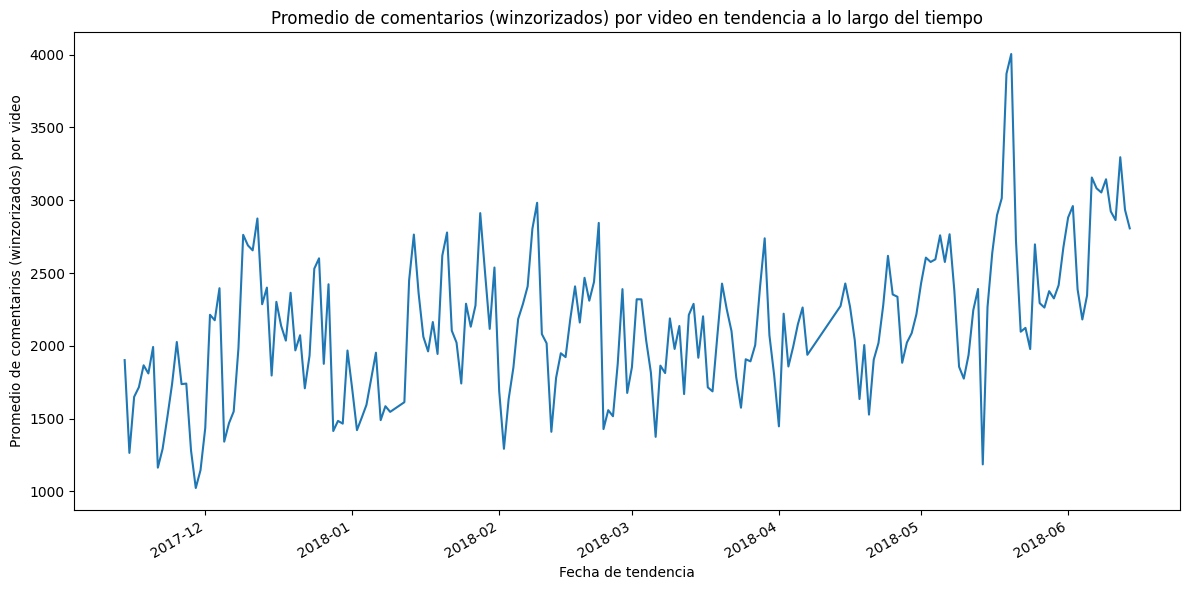

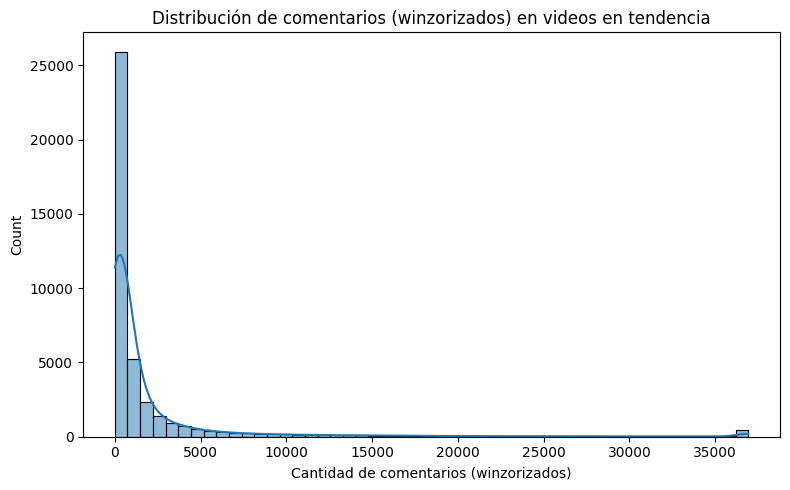

count    40839.000000
mean      2134.194814
std       5491.027192
min          0.000000
25%         79.000000
50%        376.000000
75%       1376.000000
max      36931.000000
Name: comment_count_winz, dtype: float64


C:\Users\Daniel\AppData\Roaming\Python\Python312\site-packages\numpy\lib\_function_base_impl.py:4809: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


In [52]:
# Promedio de comentarios (winzorizados) por video en tendencia por día
comentarios_por_dia = df.groupby('trending_date')['comment_count_winz'].mean()

plt.figure(figsize=(12,6))
comentarios_por_dia.plot()
plt.xlabel('Fecha de tendencia')
plt.ylabel('Promedio de comentarios (winzorizados) por video')
plt.title('Promedio de comentarios (winzorizados) por video en tendencia a lo largo del tiempo')
plt.tight_layout()
plt.show()

# Distribución de comentarios (winzorizados) por video
plt.figure(figsize=(8,5))
sns.histplot(df['comment_count_winz'], bins=50, kde=True)
plt.xlabel('Cantidad de comentarios (winzorizados)')
plt.title('Distribución de comentarios (winzorizados) en videos en tendencia')
plt.tight_layout()
plt.show()

# Resumen estadístico
print(df['comment_count_winz'].describe())


La mayoría de los videos en tendencia reciben menos de 2,134 comentarios, según el análisis de la variable `comment_count_winz`. Esto indica que, aunque estos videos logran posicionarse en tendencias y alcanzar una alta visibilidad, el volumen de comentarios no suele ser significativamente elevado. Por lo tanto, estar en tendencia no garantiza una gran cantidad de interacción en forma de comentarios, lo que sugiere que otros factores, como los likes o las visualizaciones, pueden ser más representativos del engagement en este tipo de contenido.

Esto representa una oportunidad para que las marcas implementen estrategias de marketing basadas en la interacción directa, como dejar comentarios destacados en videos populares o incentivar a los creadores a mencionar y responder comentarios de marcas durante el video. Esta táctica puede aumentar la visibilidad de la marca, fomentar la conversación y diferenciarse en un espacio donde la competencia por la atención en los comentarios aún es baja.

### 9. ¿Es factible predecir el número de “Vistas” o “Me gusta” o “No me gusta”?

RMSE: 1120576.82


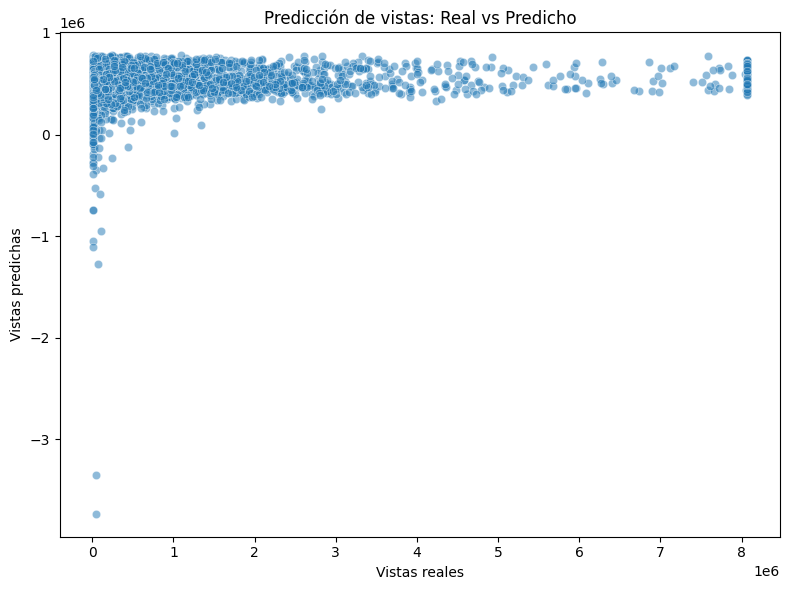

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns

# Variables predictoras (puedes agregar más)
X = df[["like_dislike_ratio", "comments_per_view", "publish_hour"]]
y = df["views"]

# Separar en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Predicción
y_pred = model.predict(X_test)

# Evaluación
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.2f}")

# Visualización: predicción vs real
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel("Vistas reales")
plt.ylabel("Vistas predichas")
plt.title("Predicción de vistas: Real vs Predicho")
plt.tight_layout()
plt.show()